<a href="https://colab.research.google.com/github/christophergaughan/christophergaughan.github.io/blob/master/Copy_of_01_neural_network_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Problems with TensorFlow

---



There are many definitions for a regression problem but here we'll go with something simple: predicting a numericalvariable based on some other combination of variables--> i.e. **predicting a number**

**Types of Questions Answered by Regression:

* How much will the house sell for?
* How many people will bu this app?
* How much will my Health Insurance be?
* How much should I save each work for petrol?

Answers <u>How Much or How Many</u> type of problems; It's predicting a NUMBER of some sort. NOTE: this is a rather simplified approach to thinking about regression b/c it holds in so many instances

**Definition of a Regression Problem:

> In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). The most common form of regression analysis is linear regression, in which one finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion. For example, the method of ordinary least squares computes the unique line (or hyperplane) that minimizes the sum of squared differences between the true data and that line (or hyperplane). For specific mathematical reasons (see linear regression), this allows the researcher to estimate the conditional expectation (or population average value) of the dependent variable when the independent variables take on a given set of values. Less common forms of regression use slightly different procedures to estimate alternative location parameters (e.g., quantile regression or Necessary Condition Analysis) or estimate the conditional expectation across a broader collection of non-linear models (e.g., nonparametric regression).

We are using independent variables to predict the dependent variable

# New Section

We will be working with:

* Architecture of neural network regression models
* Input shapes and output shapes of regression model (featuresw and labels)
* Creating custom data to view it
* Steps in modelling
* Creating a model, compiling it, fitting the model, avauating model
* Different evaluation methods
* Saving and loading models

### Regression INPUTS AND OUTPUTS

We will be maipulating numbers using some type of numerical coding--> particularly for categorical data (one-hot encoding). These are our features/covariates/predictors

EXAMPLE OF SUPERVISED LEARNING

If we want to find the price of a house, we could look at various independent variables in the houses nearby and see how they line-up with the independent variable, things such as:

* Number of Bathrooms
* numer of bedrooms
* Number of garage spaces

It will thus learn the association of the input variables, with the output variable for use cases we would like to predict such an output variable.

We will also be concerned with our input and output shapes.

In above sample, the input shape is 3 and the output shape is one

### Architecture of a regression model

[!picture](architecture of a regression model)

Below is the non-Tensorflow (i.e. a Mahine Learning) example of a regression analysis for the happiness index in OECD Countries as a function of GDP, but we are trying to find out how happy people are in Cypress (i.e. the model was trained on data from other countries, and you can see from the plot that there is some correlation, perhaps this model is useful). It seems that people in Cypress have a happiness index of ~ 6.3 aspredicted by this model

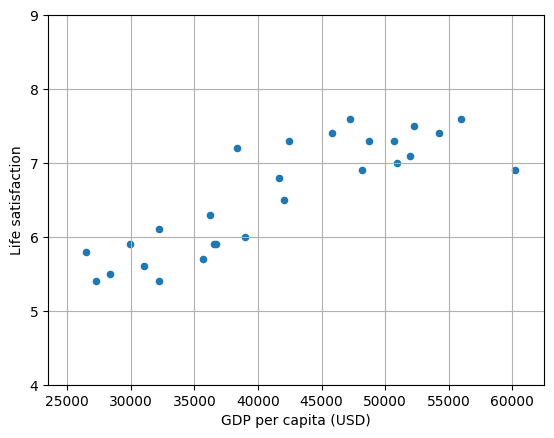

[[6.30165767]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new))




## Anatomy of a Neural Network:

* input layer- same shape as the number of features (i.e. indenpendent variables such 3 for $ bedroomes, # bathrooms, # parking spaces in housing price prediction)
* hidden layer(s)- Problem specific, there are a minimum of 1 hidden layers but <u>no maximum</u>, i.e. unlimited
* Neurons per hidden layer- Problem specific, generally in range of 10 --> 100
* Output layer- same shape as desired prediction shape(e.g. 1 for house price)
* Hidden activation function- usually `ReLu` (rectified linear unit)
* Output activation- None, logistic/tanh
* Loss function- `MSE` (mean squared error) or `MAE`(mean absolute error)/Huber(combination of MAE/MSE) if outliers)
* Optimizer- SGD(stochastic gradient descent) `ADAM` is a typical optimizer


**Here's an example of a script regresssion model script that uses the ideas presented above**
```
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.Input(shape =(3,)) #3 neurons in the `input layer`
    tf.keras.layers.Dense(100, activation="relu"), #100 neurons in the first `hidden layer`
    tf.keras.layers.Dense(100, activation="relu"), #100 neurons in the second `hidden layer`
    tf.keras.layers.Dense(100, activation="relu"), #100 neurons in the third `hidden layer`
    tf.keras.layers.Dense(1, activation=None) #1 neuron in the output layer # 1 neuron in the `output layer`
])

# 2 Compile the model
model.compile(loss=tf.keras.losses.mae, # this is a measure of how wrong our predictions are
              optimizer=tf.keras.optimizers.Adam lr = 0.0001), # this Adam function tells our model how to improve our patterns to minimize the loss function
              metrics=[mae])

# 3 fit the model
model.fit(X-train, y_train, epochs = 100)

```



In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)


2.12.0


### Creating data to view a fit

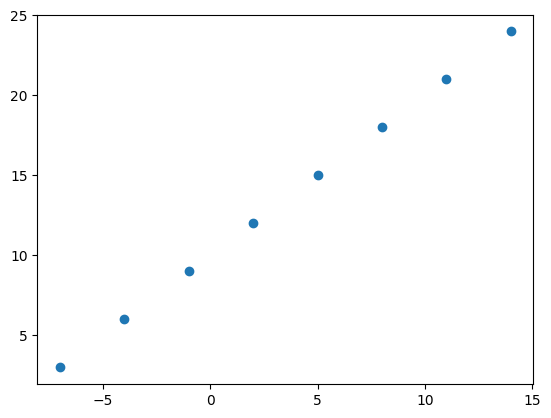

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [ ]:
 # what is the relationship between X & y?? (our input features=X, our dependent var= y)
 y == X + 10
# We are correct in our guess that y = X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes- Model features and labels

In [ ]:
# Create a demo for our housing price prediction model in the form of tensors
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape


((8,), (8,))

**hmm, we just want to know what the y value is based on the sample of X above**

In [ ]:
# what if it was just one sample
X[0], y[0]


(-7.0, 3.0)

In [ ]:
X[1], y[1]



(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


((), ())

**from what we can see above out inputs and outputs have no shape!! Thus, we are looking at scalars**

In [ ]:
X[0].ndim


0

### How can we turn these numbers that we created in numpy into TENSORS?

In [ ]:
# Turn numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

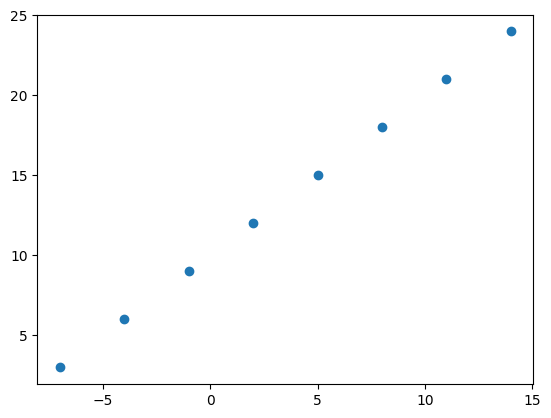

In [ ]:
plt.scatter(X, y)


### How *might* we create a model to find out the relationships between X & y?

## Steps to modelling with TensorFlow

1. *Creating a model*- define the input and output layers, as well as the hidden layers of a neural network
2. *Compiling a model*- define the loss function (in other words, the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (wehat we can use to interpret the performance of our model).
3. *Fitting a model* - letting the model try to find patternsbetween X & y (**Features** and **Labels**).
4. Get used to calling independent variables **FEATURES**, and the dependent variables **LABELS**. Make this part of your vocabulary now.



```
# This is formatted as code
# Create a `Sequential` model and add a Dense layer as the first layer.
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
# Now the model will take as input arrays of shape (None, 16)
# and output arrays of shape (None, 32).
# Note that after the first layer, you don't need to specify
# the size of the input anymore:
model.add(tf.keras.layers.Dense(32))
model.output_shape


```



In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model using the Sequential API. NOTICE the list data structure here
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model (Suggestion: Go to wikipedia and look up MAE)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (NOTE: this code has been updated to TensorFlow 2.7.0+)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 482ms/step - loss: 12.0213 - mae: 12.0213
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.8888 - mae: 11.8888
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 11.7563 - mae: 11.7563
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.6238 - mae: 11.6238
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 11.4913 - mae: 11.4913


In [ ]:
# Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model. NOTE the MAE says our model is off ~ 14
y_pred = model.predict([20.0])
y_pred

1/1 [==============================] - 0s 81ms/step


array([[11.999797]], dtype=float32)

In [ ]:
y_pred + 14

array([[25.999798]], dtype=float32)

### Our model is not predicting the proper value at all

**So we must find ways to improve our neural network**
1. Notice above we used the `SGD` optimization function (O.F.) - let's use the `ADAM` O.F. (*remember* that the optimization function tells our model how it can improve). Notice that `Adam` uses an `lr` or <u>learning rate</u>. In other word, when our `Adam` optimizer tells our model how to improve, specifically, it tells it *how much* to improve at each step.
2. We can increase the number of **Epochs**- i.e. how many times does the model look at the data. Let's increase it to 100 (as opposed to 5 as we did above).
3. Realize that sometimes you must run smaller models as we did above, be prepared to change parameters (we will explore this more in the code).

> Let's recall our graph from above

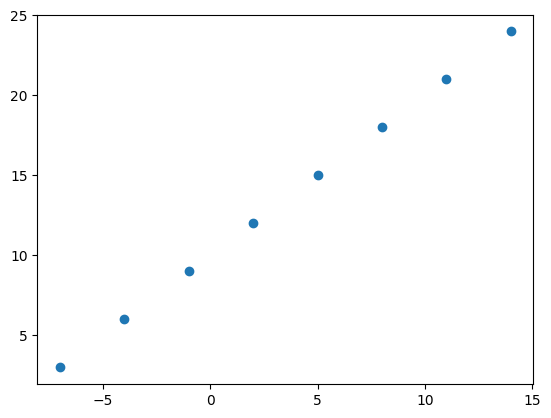

In [ ]:
plt.scatter(X, y)

In [ ]:
# Let's rebuild our model, but add the Adam Optimzing Function (O.F.) as an X value of 17 should yield y-value of ~27

#  1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 10.7882 - mae: 10.7882
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7432 - mae: 10.7432
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6982 - mae: 10.6982
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6532 - mae: 10.6532
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6082 - mae: 10.6082
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5632 - mae: 10.5632
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5182 - mae: 10.5182
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4732 - mae: 10.4732
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4282 - mae: 10.4282
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.3832 - mae: 10.3832
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model can predict the `y` value for `X=17`
model.predict([17.0])


1/1 [==============================] - 0s 82ms/step


array([[30.251186]], dtype=float32)

## The Model has improved *slightly*, but I would predict the number to be ~27 for an X value of 17. Lets try to improve the model even further. **Note** last time I changes the optimizer to `Adam` instead of `SGD`

In [ ]:
# Let's rebuild our model, but this time we will use a larger model

#  1. Create the model (this time with two extra hidden layers each with with 100 layers)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5639 - mae: 13.5639
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.4682 - mae: 11.4682
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 9.4490 - mae: 9.4490
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 6.5068 - mae: 6.5068
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 4.1111 - mae: 4.1111
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 6.0773 - mae: 6.0773
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.2754 - mae: 6.2754
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 4.9587 - mae: 4.9587
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 3.6944 - mae: 3.6944
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.3950 - mae: 4.3950
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - 

## Has the model improved with using the combination of `Adam` O.F. and the addition of the change in the adding the extra layers??

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets try to make a prediction
model.predict([17.0])


1/1 [==============================] - 0s 98ms/step


array([[27.838846]], dtype=float32)

### Hey! this is much closer obviously. We just added some hidden layers!

** Ways to improve our model**
1. Adding fidden Layers
2. Increase the number of hidden units (Neurons)
3. Change the activation function (A.F.)
4. Change the optimization function (O.F.)
5. Change the learning rate on O.F. that use this as a parameter. `Adam` doen indeed require this parameter.


# Evaluate a model

In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model-> fit it -> evaluate it -> tweak the model ->fit it -> evaluate it -> tweak it -> fit it -> evaluate....etc
```

**What we are doing is changing the model's <u>hyperparameter's</u>**

When it comes to evaluation, there are 3 words you should memorize:

1. Visualize, visualize, visualize
* The data - what type of data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?    
2. Train, train, train
3. Fit, fit, fit     

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

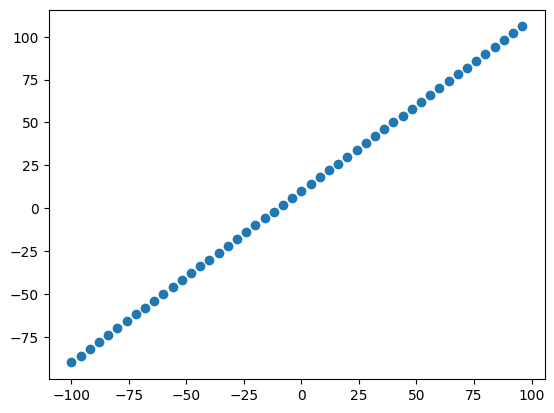

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)


### The 3 sets...
* **Training set** - We will use `X-train/y_train` in our code to symbolize this. The model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data you have available.
* **Test set** - We will use `X_test/y_test` in our code to denote this. The model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data you have available.

Think of it like how you would study for an exam:
you have:
1. The course materials (The training set, `X_train/y_train`)
2. Practice exam (validation set)
3. Final exam (test set, `X_test/y_test`)



In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [ ]:
# Check the length of how many samples we have
len(X)

50

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it!


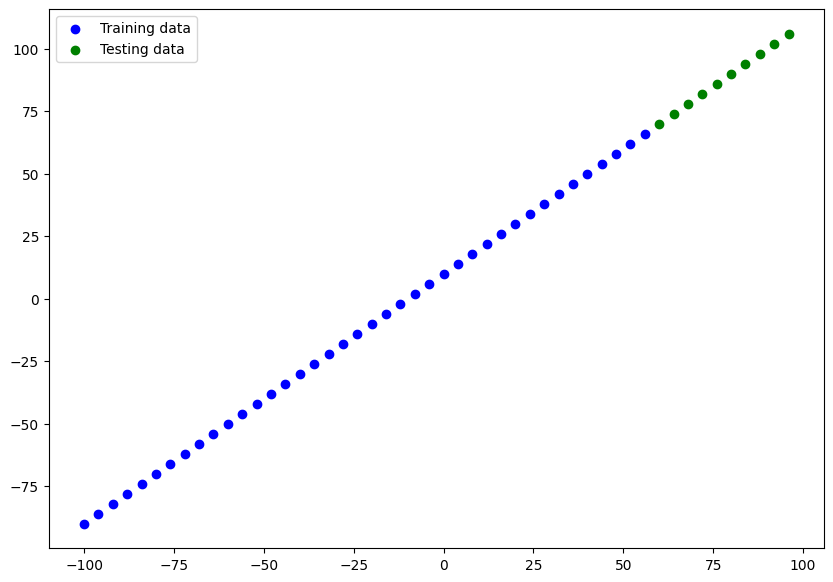

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend();


### Notice how the train data is split from the test data visually (i.e. notice the proportion in how much data is used to train the model and how much is used to test the model)

In [ ]:
# Let's look at how to build a neural network for our data

# Create a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 24.9466 - mae: 24.9466
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 8.2049 - mae: 8.2049
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2855 - mae: 10.2855
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 12.6875 - mae: 12.6875
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7345 - mae: 11.7345
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8482 - mae: 10.8482
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7176 - mae: 8.7176
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 7.7227 - mae: 7.7227
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 20.0241 - mae: 20.0241
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 13.6731 - mae: 13.6731
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

## Visualizing the model

In [ ]:
# let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer" ),
  tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()


Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model
* Trainable params - The number of parameters in the model (patterns) the model can update as it trains.
* Non-trainable params - The number of parameters not updated during training (this is typically used for fine-tuning)
* We will update what *non-trainable params* are later. However, sometimes models are ported with parameters it already knoes and we can freeze this to free up processing power. Think **Transfer Learning**

If you want to learn about what the actual parameters are in a Dense Layer, you're probably going to find something called a **weights matrix** and a **bias vector**

## Neural Networks: Weights and Biases

### Weights Matrix

In a neural network, each connection between the neurons of consecutive layers has an associated weight. If we consider a layer $l$ with $n$ neurons and the following layer $l+1$ with $m$ neurons, the weights connecting these two layers can be represented by a matrix $\mathbf{W}^{(l)}$ of size $m \times n$.

$$
\mathbf{W}^{(l)} = \left[ \begin{array}{cccc}
w_{1,1}^{(l)} & w_{1,2}^{(l)} & \cdots & w_{1,n}^{(l)} \\
w_{2,1}^{(l)} & w_{2,2}^{(l)} & \cdots & w_{2,n}^{(l)} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m,1}^{(l)} & w_{m,2}^{(l)} & \cdots & w_{m,n}^{(l)}
\end{array} \right]
$$

Here, the entry $w_{i,j}^{(l)}$ represents the weight from the $j$-th neuron of layer $l$ to the $i$-th neuron of layer $l+1$.

### Bias Vector

Each neuron in a neural network also has an associated bias. For a layer $l+1$ with $m$ neurons, the biases can be represented as a column vector $\mathbf{b}^{(l)}$ of size $m \times 1$.

$$
\mathbf{b}^{(l)} = \left[ \begin{array}{c}
b_{1}^{(l)} \\
b_{2}^{(l)} \\
\vdots \\
b_{m}^{(l)}
\end{array} \right]
$$

The bias helps the neuron to make decisions by adjusting its output. It can be thought of as a shift or offset.



**What about the traiinable parameters??**

## Trainable Parameters in a Neural Network

In a neural network, the goal during the training process is to adjust the network's parameters to minimize some predefined loss or cost function. The primary trainable parameters in a typical neural network are the weights and biases associated with each neuron in every layer.

### Weights

Weights are the values that determine the strength of the connection between two neurons from consecutive layers. For a layer $l$ with $n$ neurons and the following layer $l+1$ with $m$ neurons, the weight matrix $\mathbf{W}^{(l)}$ of size $m \times n$ represents these connections.

$$
\mathbf{W}^{(l)} = \left[ \begin{array}{cccc}
w_{1,1}^{(l)} & w_{1,2}^{(l)} & \cdots & w_{1,n}^{(l)} \\
w_{2,1}^{(l)} & w_{2,2}^{(l)} & \cdots & w_{2,n}^{(l)} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m,1}^{(l)} & w_{m,2}^{(l)} & \cdots & w_{m,n}^{(l)}
\end{array} \right]
$$

Here, $w_{i,j}^{(l)}$ represents the weight connecting the $j$-th neuron of layer $l$ to the $i$-th neuron of layer $l+1$.

### Biases

Biases allow neurons to make decisions by adjusting their output. They can be thought of as a kind of shift or offset that a neuron can use to produce its output, given an input. For a layer $l+1$ with $m$ neurons, the bias vector $\mathbf{b}^{(l)}$ of size $m \times 1$ represents these biases.

$$
\mathbf{b}^{(l)} = \left[ \begin{array}{c}
b_{1}^{(l)} \\
b_{2}^{(l)} \\
\vdots \\
b_{m}^{(l)}
\end{array} \right]
$$

Both weights and biases are adjusted during the training process using optimization algorithms like gradient descent to minimize the loss function.



### The structure of the neural network: *weights and biases*

📖 **Resource**: If you want to look at a more in depth view of the trainable oarameters with a layer, check out MIT's introduction to deep learning video.

*Note*: below is a representation of a fully connected layers in a neural network. In TenjsorFlow, a fully connected layer is a `Dense-layer`. So refer to this when thinking of what the `Dense layers` in the code actually mean. The total number of patterns are the total number of patterns our model is going to try to learn.

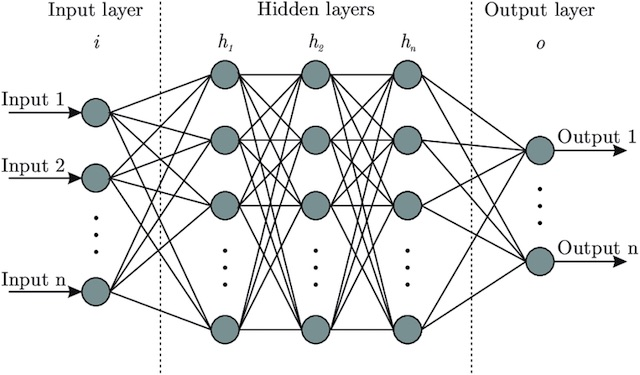

** What about the trainable parameters?**

## Trainable Parameters in a Neural Network

In a neural network, the goal during the training process is to adjust the network's parameters to minimize some predefined loss or cost function. The primary trainable parameters in a typical neural network are the weights and biases associated with each neuron in every layer.

### Weights

Weights are the values that determine the strength of the connection between two neurons from consecutive layers. For a layer $l$ with $n$ neurons and the following layer $l+1$ with $m$ neurons, the weight matrix $\mathbf{W}^{(l)}$ of size $m \times n$ represents these connections.

$$
\mathbf{W}^{(l)} = \left[ \begin{array}{cccc}
w_{1,1}^{(l)} & w_{1,2}^{(l)} & \cdots & w_{1,n}^{(l)} \\
w_{2,1}^{(l)} & w_{2,2}^{(l)} & \cdots & w_{2,n}^{(l)} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m,1}^{(l)} & w_{m,2}^{(l)} & \cdots & w_{m,n}^{(l)}
\end{array} \right]
$$

Here, $w_{i,j}^{(l)}$ represents the weight connecting the $j$-th neuron of layer $l$ to the $i$-th neuron of layer $l+1$.

### Biases

Biases allow neurons to make decisions by adjusting their output. They can be thought of as a kind of shift or offset that a neuron can use to produce its output, given an input. For a layer $l+1$ with $m$ neurons, the bias vector $\mathbf{b}^{(l)}$ of size $m \times 1$ represents these biases.

$$
\mathbf{b}^{(l)} = \left[ \begin{array}{c}
b_{1}^{(l)} \\
b_{2}^{(l)} \\
\vdots \\
b_{m}^{(l)}
\end{array} \right]
$$

Both weights and biases are adjusted during the training process using optimization algorithms like gradient descent to minimize the loss function.



## Total Trainable Parameters in a Neural Network

The total number of trainable parameters in a neural network is the cumulative sum of all weights and biases across every layer.

For a given layer $l$ with $n_l$ neurons and the subsequent layer $l+1$ with $n_{l+1}$ neurons:

1. **Weights**: There are $n_l \times n_{l+1}$ weights between layer $l$ and $l+1$.

2. **Biases**: There are $n_{l+1}$ biases for the neurons in layer $l+1$.

Hence, the total number of trainable parameters between layer $l$ and layer $l+1$ is:
$$
n_l \times n_{l+1} + n_{l+1}
$$

To find the total number of trainable parameters in the entire neural network with $L$ layers, we sum over all layers:
$$
\sum_{l=1}^{L-1} \left( n_l \times n_{l+1} + n_{l+1} \right)
$$

This equation gives the cumulative sum of all weights and biases in the network.


In [ ]:
# Get a summary of the model
model.summary()




Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### We can <u>visualize</u> our neural network model as hown below from the coding cell right before the discussing of th error calculation where the heading immediately above says "Visualizing the model"*italicized text*

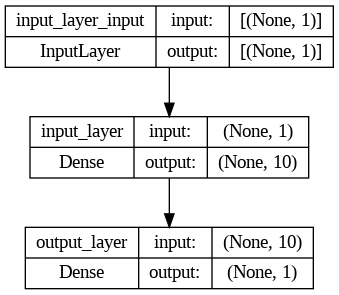

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


### Recall the data we are training to:

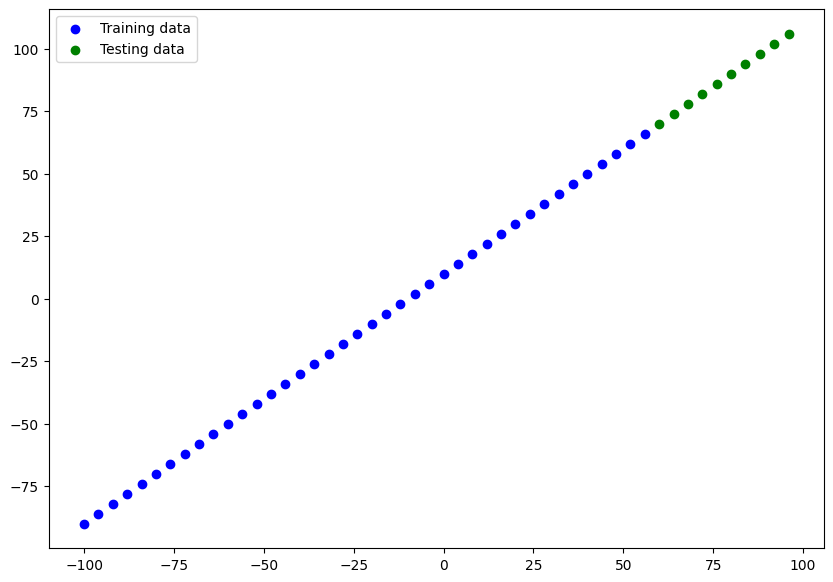

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

In [ ]:
# Now let's fit the mdoel
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose='False')

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


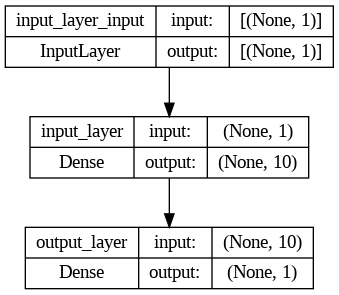

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


### Visualizing our model's predictions

To visualize our model's predictions, we can plot the model's predictions against the `ground truth` labels.

you'll often see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)




In [ ]:
# Make some predictions, i.e. these are the models predictions based off Model_2, ideally would be the same numbers in the ground truth
y_pred = model.predict(X_test)
print(f'Here are our predictions {y_pred}, and Here is the ground-truth {y_test}')

1/1 [==============================] - 0s 54ms/step
Here are our predictions [[ 78.303085]
 [ 83.40695 ]
 [ 88.51081 ]
 [ 93.61467 ]
 [ 98.71852 ]
 [103.82239 ]
 [108.92624 ]
 [114.0301  ]
 [119.13396 ]
 [124.23781 ]], and Here is the ground-truth [ 70  74  78  82  86  90  94  98 102 106]


**So there is a degree of disparity of our modeled prediction and the ground-truth data (y_test)**

In [ ]:
y_pred.shape


(10, 1)

In [ ]:
y_test.shape

TensorShape([10])

In [ ]:
def print_args(*args, **kwargs):
    print("Positional arguments:", args)
    print("Keyword arguments:", kwargs)

# Usage
print_args(1, 2, 3, a='Z', b='L')

Positional arguments: (1, 2, 3)
Keyword arguments: {'a': 'Z', 'b': 'L'}


**If you feel like you're going to reuse some kind of functionality in the future, you can create a function.** If you're not used to creating and calling (or if you've become a little rusty) a python function always takes the form:

A Python function is defined using the **def** keyword, followed by a function name, a set of parentheses ( ), and a colon :. The function body is indented, and the function can accept arguments and return values. Again, if you havn't done this in a while, paractice a few and it will all come back.

Here's a simple example:
### Basic syntax
```
def greet(name):
    return f"Hello, {name}!"

# Call the function
message = greet("Chris")
print(message)  
# Output:
Hello, Chris!
```
### Arguments and Return Values
Functions can take multiple arguments and can also return multiple values.


```
def add_and_multiply(a, b):
    sum_result = a + b
    multiply_result = a * b
    return sum_result, multiply_result

# Usage
s, m = add_and_multiply(3, 4)
print(f"Sum: {s}, Multiplication: {m}")  
# Output:
Sum: 7, Multiplication: 12

```
### Default Arguments
You can specify default values for arguments:


```
def greet(name, greeting="Hello"):
    return f"{greeting}, {name}!"

# Usage
print(greet("Chris"))        # Output: Hello, Chris!
print(greet("Chris", "Hi"))  # Output: Hi, Chris!

```
### Variable Arguments
You can pass a variable number of arguments using *args and **kwargs.

The special syntax *args and **kwargs in Python function definitions is used to pass a variable number of arguments to a function. They are often used when you're not sure how many arguments will be passed to the function, or when you want to handle named and unnamed arguments differently. Here's how they differ:

*args

The *args syntax allows you to pass a variable number of non-keyword (positional) arguments to a function. Inside the function, args is a *tuple* containing all the values passed to the function.

**kwargs

The **kwargs syntax allows you to pass a variable number of keyword arguments to a function. Inside the function, kwargs is a *dictionary* containing the keys and values of the keyword arguments.
```
def print_args(*args, **kwargs):
    print("Positional arguments:", args)
    print("Keyword arguments:", kwargs)

# Usage

Positional arguments: (1, 2, 3)
Keyword arguments: {'a': 'Z', 'b': 'L'}


# Usage
print_args(1, 2, 3, a='Z', b='L')

# Output
Positional arguments: (1, 2, 3)
Keyword arguments: {'a': 'Z', 'b': 'L'}
```


### Example Relevant to TensorFlow
Since you are learning TensorFlow, here's an example function that creates a simple neural network model using TensorFlow. This assumes TensorFlow 2.x:



```
import tensorflow as tf

def build_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Usage
model = build_model((28, 28, 1), 10)  # For a 28x28 grayscale image and 10 classes
model.summary()
```
### Now that you have been reminded of that, let's get on to our first function- a functon we will use again and again that we can simply call at our leisure










In [ ]:
from keras.engine import training

# Let's create a plotting *function*

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

    plt.figure(figsize=(10, 7))
    #  Plot training data in blue, test data in greenand predictions in red
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show a legend
    plt.legend()
    # Show the plot
    plt.show()



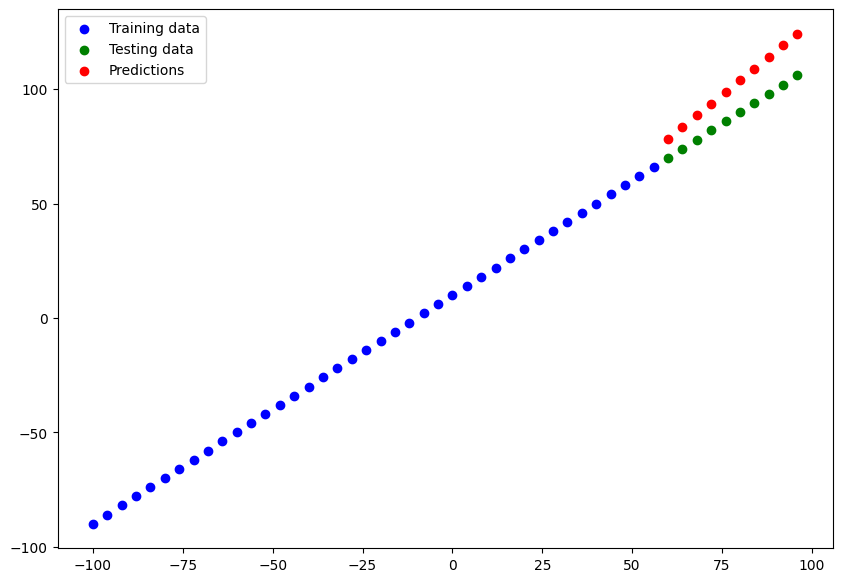

In [ ]:
# Don't forget to call the function!!!
plot_predictions()


### It seems pretty good!

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose='False')



Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


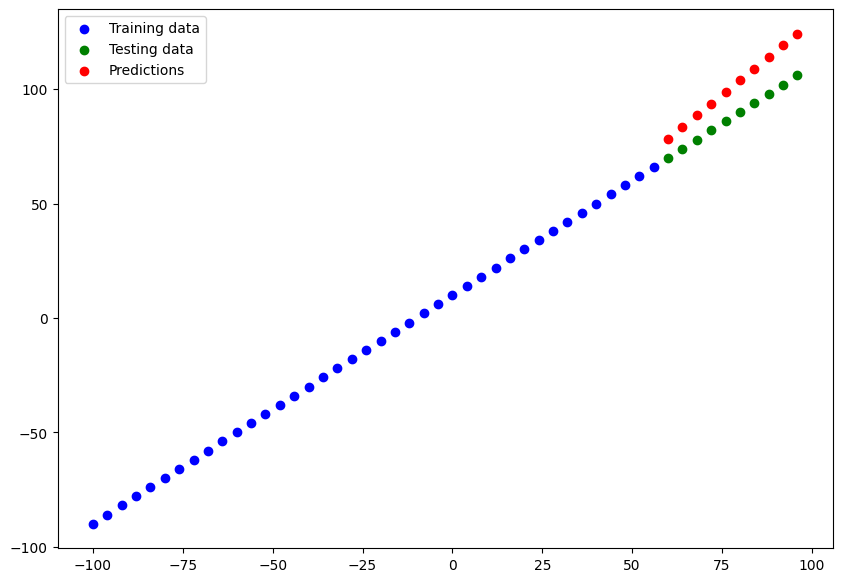

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)





[link text](https://)**Our model could be better, obviously**

## Evaluating our model's predictions with regression evaluation metrics

 Depending on the type of problem you're trying to solve, you'll need to use different evaluation metrics to evaluate your models performance

 Since we're working with a regression problem, two main metrics:.
1. MAE- Mean Absolute Error, i.e. "How wrong are each of my models predictions". **This is a great starter metric for ANY regression problem**

## Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is a metric used to evaluate the average magnitude of errors between the predicted and actual values in regression tasks. The formula for computing the MAE is given by:

$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$

Where:
- $N$ is the number of data points.
- $y_i$ represents the actual value of the $i^{th}$ data point.
- $\hat{y}_i$ represents the predicted value of the $i^{th}$ data point.



2. MSE - Mean Squared Error. Here you square the average error. **Use this when larger errors are more significant than smaller errors**
## Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a metric used to evaluate the average of the squares of the errors or deviations between the predicted and actual values in regression tasks. The formula for computing the MSE is:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Where:
- $N$ is the number of data points.
- $y_i$ represents the actual value of the $i^{th}$ data point.
- $\hat{y}_i$ represents the predicted value of the $i^{th}$ data point. This is y_pred


## Huber Loss (Huber Error)
**Combination of MSE and MAE. Less sensitive to outliers than MSE**
The Huber loss, also known as the Huber error, provides a balance between the Mean Squared Error (which is sensitive to outliers) and the Mean Absolute Error (which is scale-dependent). It's defined as:
$$
L_\delta(y, \hat{y}) = \begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta \\
\delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{otherwise}
\end{cases}
$$
Where:
- $y$ is the actual value.
- $\hat{y}$ is the predicted value.
- $\delta$ is a threshold. For errors less than $\delta$, the loss is quadratic. For errors greater than $\delta$, the loss is linear.



In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 257ms/step - loss: 12.9992 - mae: 12.9992


[12.999226570129395, 12.999226570129395]

In [ ]:
y_pred

array([[ 78.303085],
       [ 83.40695 ],
       [ 88.51081 ],
       [ 93.61467 ],
       [ 98.71852 ],
       [103.82239 ],
       [108.92624 ],
       [114.0301  ],
       [119.13396 ],
       [124.23781 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolute error (MAE)
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred)
mae



<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.278766, 10.51861 , 10.      , 10.722934, 12.831113, 16.25791 ,
       20.926239, 26.030096, 31.133957, 36.23781 ], dtype=float32)>

### This kind of seems like an unusual output, let's try something

In [ ]:
y_test - y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -8,  -4,   0,   4,   8,  12,  16,  20,  24,  28],
       [-13,  -9,  -5,  -1,   3,   7,  11,  15,  19,  23],
       [-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18],
       [-23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13],
       [-28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8],
       [-33, -29, -25, -21, -17, -13,  -9,  -5,  -1,   3],
       [-38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2],
       [-44, -40, -36, -32, -28, -24, -20, -16, -12,  -8],
       [-49, -45, -41, -37, -33, -29, -25, -21, -17, -13],
       [-54, -50, -46, -42, -38, -34, -30, -26, -22, -18]], dtype=int32)>

In [ ]:
y_pred - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  8,   4,   0,  -4,  -8, -12, -16, -20, -24, -28],
       [ 13,   9,   5,   1,  -3,  -7, -11, -15, -19, -23],
       [ 18,  14,  10,   6,   2,  -2,  -6, -10, -14, -18],
       [ 23,  19,  15,  11,   7,   3,  -1,  -5,  -9, -13],
       [ 28,  24,  20,  16,  12,   8,   4,   0,  -4,  -8],
       [ 33,  29,  25,  21,  17,  13,   9,   5,   1,  -3],
       [ 38,  34,  30,  26,  22,  18,  14,  10,   6,   2],
       [ 44,  40,  36,  32,  28,  24,  20,  16,  12,   8],
       [ 49,  45,  41,  37,  33,  29,  25,  21,  17,  13],
       [ 54,  50,  46,  42,  38,  34,  30,  26,  22,  18]], dtype=int32)>

### What????? Seems an unusual output, not at all what I was expecting

💭 Let's see what happens when we turn y_pred into a tensor

In [ ]:
# Calculate the mean absolute error (MAE)
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred= tf.convert_to_tensor(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.278766, 10.51861 , 10.      , 10.722934, 12.831113, 16.25791 ,
       20.926239, 26.030096, 31.133957, 36.23781 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.303085],
       [ 83.40695 ],
       [ 88.51081 ],
       [ 93.61467 ],
       [ 98.71852 ],
       [103.82239 ],
       [108.92624 ],
       [114.0301  ],
       [119.13396 ],
       [124.23781 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Aha, look above, y_pred has a shape od 10, 1 and y_test has a shape of 10,?**

<u>Remember</u> from the first notebook about the shapes of the arrays and how they have to match in many cases

**The question becomes, *How are we going to make these tensors match??***
In this case will will use the `squeeze` functionality of TensorFlow:

### Purpose

The tf.squeeze function is used to remove dimensions of size 1 from the shape of a tensor. This is useful for simplifying the shape of the tensor, making it easier to work with.

### Functionality

Consider a tensor y_pred with shape (1, 10, 1). After applying tf.squeeze(y_pred), the shape will be transformed to (10,).


If y_pred has shape (1, 10, 1), then tf.squeeze(y_pred) will have shape (10,).
If y_pred has shape (1, 10, 2), then tf.squeeze(y_pred) will have shape (10, 2).
Syntax
The function can be more specific about which dimensions to squeeze:


tf.squeeze(y_pred, axis=None) will remove all dimensions of size 1.
tf.squeeze(y_pred, axis=[0, 2]) will remove dimensions 0 and 2 if they are of size 1.

In [ ]:
tf.squeeze(y_pred) # We make them match


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.303085,  83.40695 ,  88.51081 ,  93.61467 ,  98.71852 ,
       103.82239 , 108.92624 , 114.0301  , 119.13396 , 124.23781 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error (MAE)
mae = tf.keras.metrics.mean_absolute_error(y_test, y_pred= tf.squeeze(y_pred))
mae



<tf.Tensor: shape=(), dtype=float32, numpy=13.2704525>

In [ ]:
# Calculate the mean sqared error (MSE)
mse = tf.keras.metrics.mean_squared_error(y_test, y_pred= tf.squeeze(y_pred))
mse



<tf.Tensor: shape=(), dtype=float32, numpy=186.15756>

☣**NOTE** I had to rerun the models from where the data was split all the way down to here to get the proper mae and mse, just beware of this ☢

In [ ]:
# Make some functions to calculate the MAE and MSE

def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(y_true,  y_pred)



### Running some experiments to improve our model

Remember our cycle:

'''
Build a model ->fit it -> evaluate it -> improve it -> repeat
'''


1. Get more data - get more examples for your model to train on (more oppotunities to learn patterns or relationships between features and labels)
2. Make a model larger (using a more complex model) - this might come in the form of adding more layers or more neurons in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data


**Let's do three modelling experiments**

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - same as the original model, 2 layers, trained for 100 epochs
3. `model_3` - same as the original model, 2 layers, trained for 500 epochs

**Note**: Here we are changing just 1 parameter at a time, and are doing so *systematically*

**Build model_1 above**

    


In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=[mae, mse])

# Fit the model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)



Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 80.7663 - mae: 80.7663 - mse: 9070.2402
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 45.3794 - mae: 45.3794 - mse: 2923.3188
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0905 - mae: 12.0905 - mse: 191.9291
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7713 - mae: 8.7713 - mse: 120.4697
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9806 - mae: 10.9806 - mse: 134.5801
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1490 - mae: 10.1490 - mse: 111.1576
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1742 - mae: 9.1742 - mse: 97.6310
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1362 - mae: 9.1362 - mse: 92.5190
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 15.1787 - mae: 15.1787 - mse: 320.3090
Epoch 10/100
2/

1/1 [==============================] - 0s 51ms/step


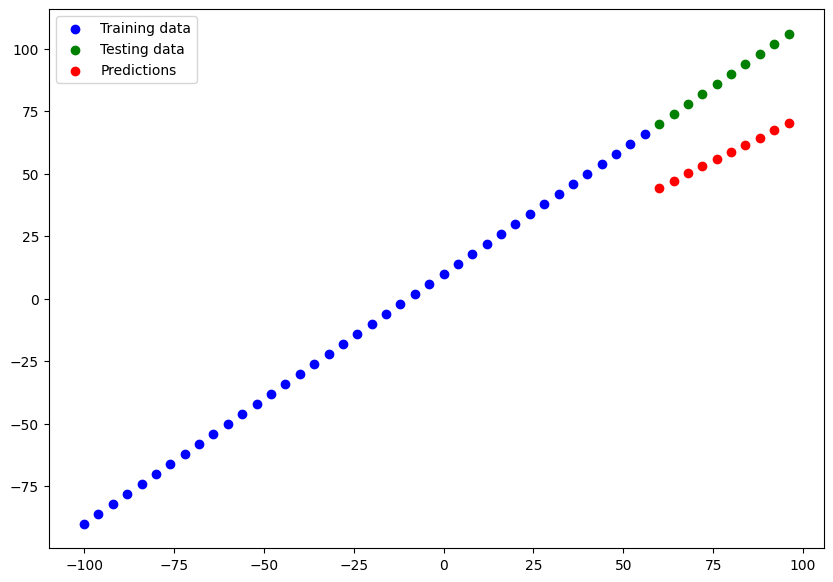

In [ ]:
# Make and plot predictions
y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)



**Our model appears to be unsatisfactory, in fact it seemed better before**

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)


(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[44.37958 ],
        [47.253387],
        [50.127193],
        [53.001   ],
        [55.874805],
        [58.74861 ],
        [61.622414],
        [64.49622 ],
        [67.370026],
        [70.24383 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.37958 , 47.253387, 50.127193, 53.001   , 55.874805, 58.74861 ,
        61.622414, 64.49622 , 67.370026, 70.24383 ], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))

print(f"MAE: {mae_1}")
print(f"MSE: {mse_1}")


MAE: 30.68829345703125
MSE: 952.2349853515625


**Model_2**
* 2 dense layers trained on 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


1/1 [==============================] - 0s 121ms/step


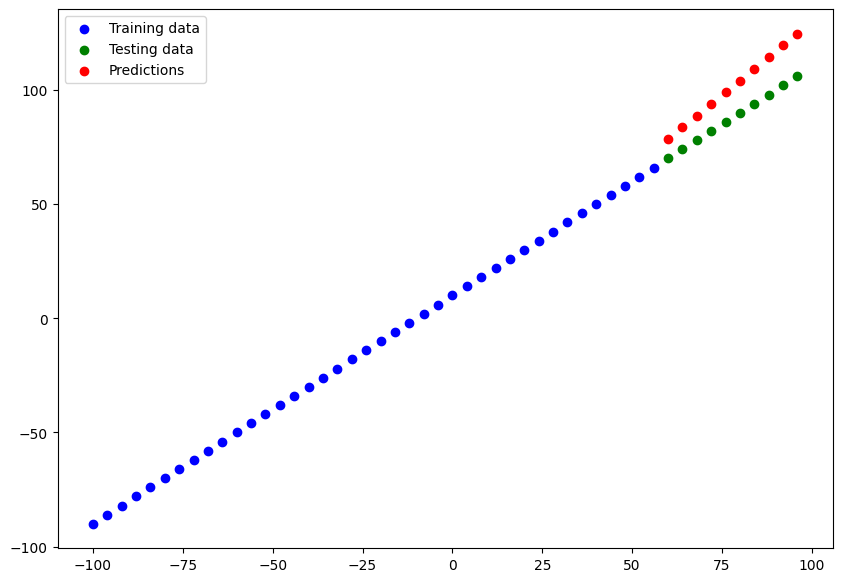

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate some evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

print(f"MAE: {mae_2}")
print(f"MSE: {mse_2}")



MAE: 13.596733093261719
MSE: 195.167724609375


**Buils Model _3**

2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500) # set verbose to 0 for less output

Epoch 1/500
2/2 [==============================] - 2s 31ms/step - loss: 39.8035 - mae: 39.8035
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 36.5028 - mae: 36.5028
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 22.6349 - mae: 22.6349
Epoch 4/500
2/2 [==============================] - 0s 18ms/step - loss: 21.1971 - mae: 21.1971
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 11.4653 - mae: 11.4653
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 9.4272 - mae: 9.4272
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 10.2766 - mae: 10.2766
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.7558 - mae: 10.7558
Epoch 9/500
2/2 [==============================] - 0s 15ms/step - loss: 36.1276 - mae: 36.1276
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 24.0057 - mae: 24.0057
Epoch 11/500
2/2 [==============================] - 

1/1 [==============================] - 0s 93ms/step


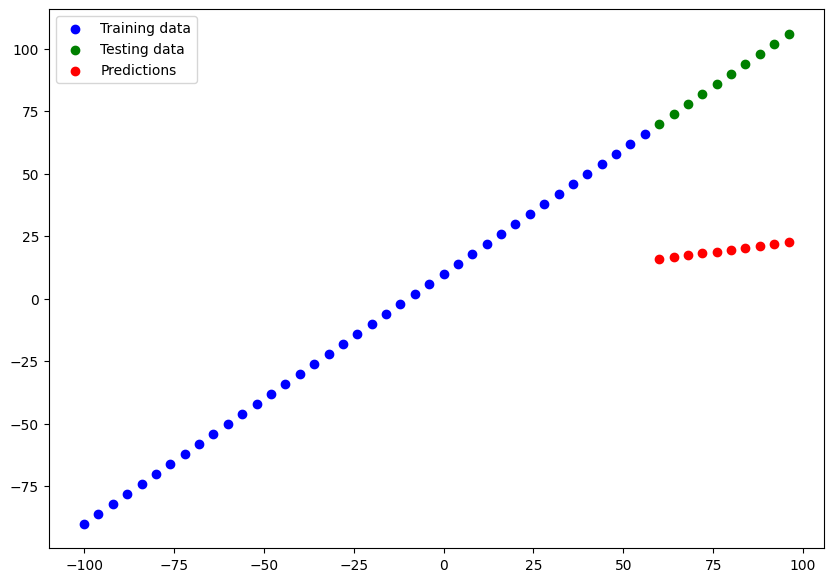

In [ ]:
# Make and plot some predictions

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)




In [ ]:
# Calculate the Model_3 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))

print(f"MAE: {mae_3 }")
print(f"MSE: {mse_3}")



MAE: 68.71559143066406
MSE: 4808.30859375


### Comparing the reults of our models

We've run a few models, let's compare the results

 🔑 **Note** You want to start with small experiemnts and make sure they work. Then one increases their scale when necessary

 ☣ These results might be a symptom of the model overfitting




In [ ]:
# Let's compare our results usng a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])

all_results

,model,mae,mse
0,model_1,30.688293,952.234985
1,model_2,13.596733,195.167725
2,model_3,68.715591,4808.308594


In [ ]:
# Model_2 did the best
model_2.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


❗**Note** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more you'll figure things out which don't work and in turn, get closer to figuring out what does work. *Remeber the Machine Learning Practioners Motto*: "*Experimentum, visualisare et operari constanter*"

## Tracking your experiments

One really good habit in ML is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us

📖**Resource**

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).

* **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google CoLab(or wherever rhey were trained) such as a web application or a mobile app.

Theree are two main formats to save our models:

1. Thew SavedModel format
2. the HDF5 format

In [ ]:
model_2.save("best_model_SavedModel_format")


In [ ]:
model_2.save("best_model_HDF5_format.h5")



### Loading saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
model_2_preds
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
loaded_SavedModel_format_preds
model_2_preds == loaded_SavedModel_format_preds





1/1 [==============================] - 0s 239ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 78.569466],
        [ 83.68664 ],
        [ 88.80381 ],
        [ 93.920975],
        [ 99.03815 ],
        [104.15531 ],
        [109.27249 ],
        [114.38966 ],
        [119.50683 ],
        [124.624   ]], dtype=float32),
 array([[ 78.569466],
        [ 83.68664 ],
        [ 88.80381 ],
        [ 93.920975],
        [ 99.03815 ],
        [104.15531 ],
        [109.27249 ],
        [114.38966 ],
        [119.50683 ],
        [124.624   ]], dtype=float32))

In [ ]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
loaded_SavedModel_format_preds.squeeze()



array([ 78.569466,  83.68664 ,  88.80381 ,  93.920975,  99.03815 ,
       104.15531 , 109.27249 , 114.38966 , 119.50683 , 124.624   ],
      dtype=float32)

In [ ]:
Model_2_preds = tf.squeeze(model_2_preds)
Model_2_preds

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.569466,  83.68664 ,  88.80381 ,  93.920975,  99.03815 ,
       104.15531 , 109.27249 , 114.38966 , 119.50683 , 124.624   ],
      dtype=float32)>

In [ ]:
loaded_SavedModel_format_preds.squeeze()


array([ 78.569466,  83.68664 ,  88.80381 ,  93.920975,  99.03815 ,
       104.15531 , 109.27249 , 114.38966 , 119.50683 , 124.624   ],
      dtype=float32)

In [ ]:
# Load in the model using the h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.ops.stateful_random_ops import SEED_BIT_MASK
# Check to to see if loaded .h5 model predictions match model_2 predictions
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds




1/1 [==============================] - 1s 506ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Loading in a model from a specific checkpoint


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with the loaded SavedModel format model predictions
model_2_preds == model_2.predict(X_test)

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds


1/1 [==============================] - 0s 105ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)



<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [ ]:
loaded_SavedModel_format_preds.squeeze()

array([ 78.569466,  83.68664 ,  88.80381 ,  93.920975,  99.03815 ,
       104.15531 , 109.27249 , 114.38966 , 119.50683 , 124.624   ],
      dtype=float32)

In [ ]:
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()




Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2 predictions
model_2_preds == model_2.predict(X_test)
loaded_h5_model_preds == loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model (or any other file) from Google Colab

1. If you want to download a model from Google Colab, you can do so by using the 'files' tab and click on the file you're after.

2. Use some code

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).


In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mountinh Google Drive)
!cp /content/best_model_HDF5_format.h5 "/content/drive/MyDrive/best_model_HDF5_format.h5"
